EDA

In [45]:
#library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_org = pd.read_csv('./power_tetouan_city_original.csv')
print(df_org.info())
print(df_org.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None
        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083            

In [9]:
#let set datetime to datetime type and as index:
df_org['DateTime'] = pd.to_datetime(df_org['DateTime'])
df_org = df_org.set_index('DateTime')
df_org.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind Speed                 52416 non-null  float64
 3   general diffuse flows      52416 non-null  float64
 4   diffuse flows              52416 non-null  float64
 5   Zone 1 Power Consumption   52416 non-null  float64
 6   Zone 2  Power Consumption  52416 non-null  float64
 7   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


In [10]:
df_org.head(5)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [11]:
print(df_org.describe())
print(df_org.isnull().sum())

        Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000     

There seems to be no nulls, or weird outliers, now lets visualize the consumpiton, before lets clean the column names

In [19]:
print(df_org.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')


In [20]:
df = df_org.copy()

In [23]:
df.rename(columns={
    'Temperature': 'temp',
    'Humidity':'hum',
    'Wind Speed':'wind',
    'general diffuse flows':'gen_diffuse_flows',
    'diffuse flows':'diffuse_flows',
    'Zone 1 Power Consumption':'z1_power_cons',
    'Zone 2  Power Consumption':'z2_power_cons',
    'Zone 3  Power Consumption':'z3_power_cons',
}, inplace=True)

In [24]:
print(df.columns)

Index(['temp', 'hum', 'wind', 'gen_diffuse_flows', 'diffuse_flows',
       'z1_power_cons', 'z2_power_cons', 'z3_power_cons'],
      dtype='object')


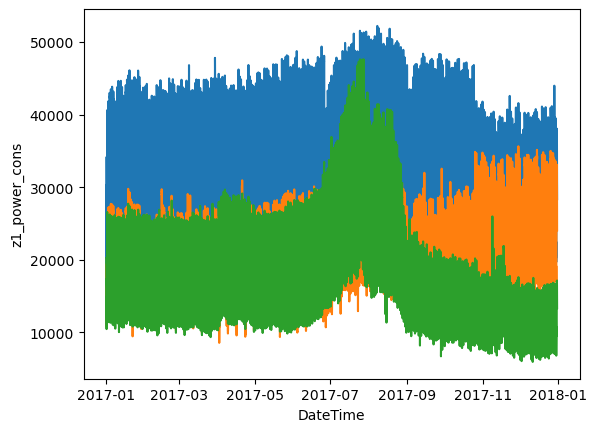

In [31]:
for zone in ['z1_power_cons','z2_power_cons','z3_power_cons']:
    sns.lineplot(x=df.index, 
                y=zone,
                data=df)

We can see a spike for all zones around month 8, which is summer, so should be because of higher temperatures. Lets look at the correlations

<Axes: >

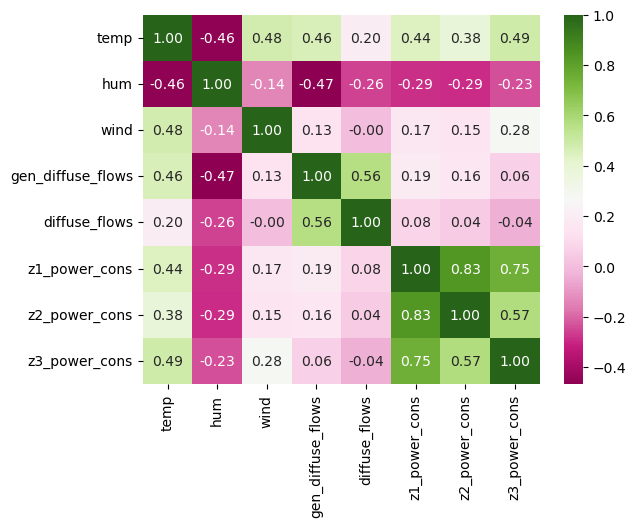

In [34]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PiYG", cbar=True)

Now lets ee correlation specific per zone

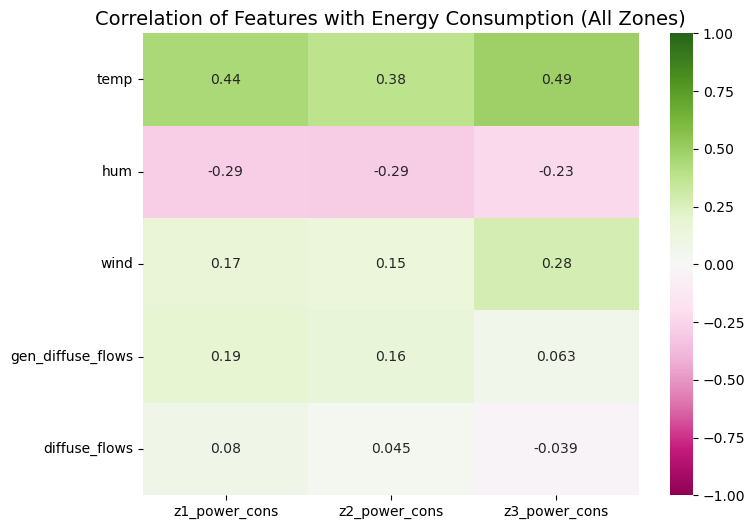

In [47]:
# Filter per zone

corr = df.corr()

features = ['temp', 'hum', 'wind', 'gen_diffuse_flows', 'diffuse_flows']
zone_corr = corr.loc[features, ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']]

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(zone_corr, annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title("Correlation of Features with Energy Consumption (All Zones)", fontsize=14)
plt.show()


We can see how there is a good correlation with the temp across all zones, and some correlation with wind and diffuse flows, and we can aslo see an inverse correlation with humidity which makes sense.  

Now we will alanyze time variables to look for seasonal effects

In [49]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['month'] = df.index.month
df['day'] = df.index.day

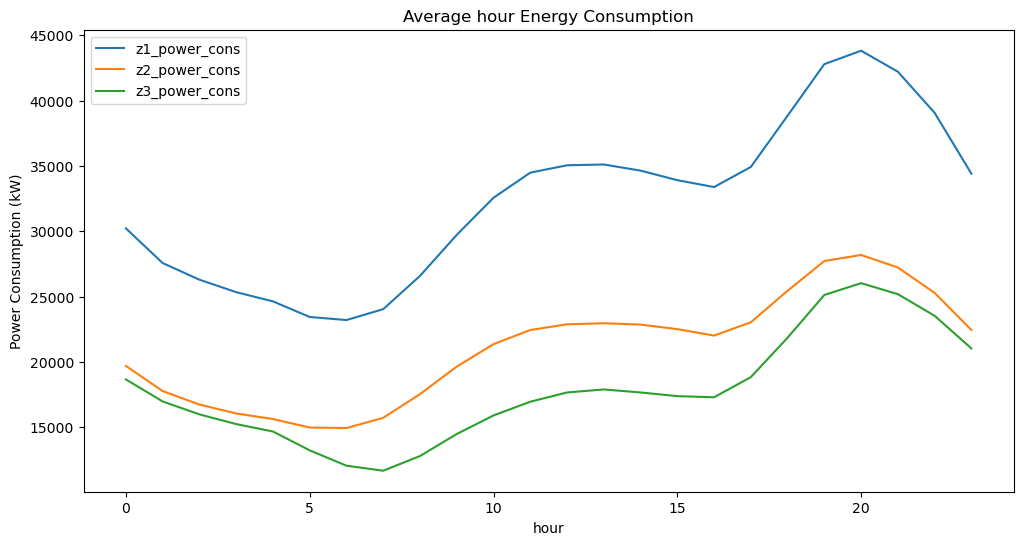

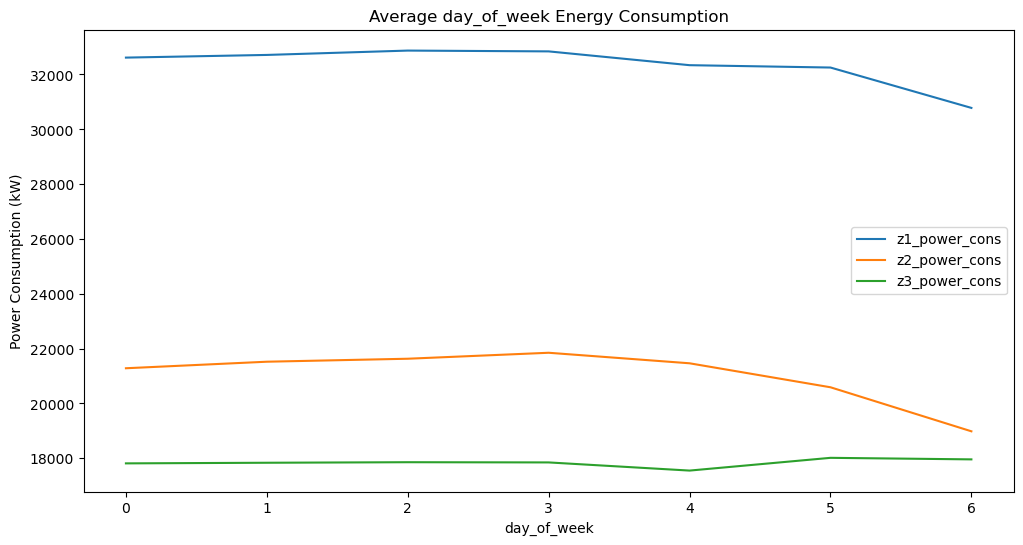

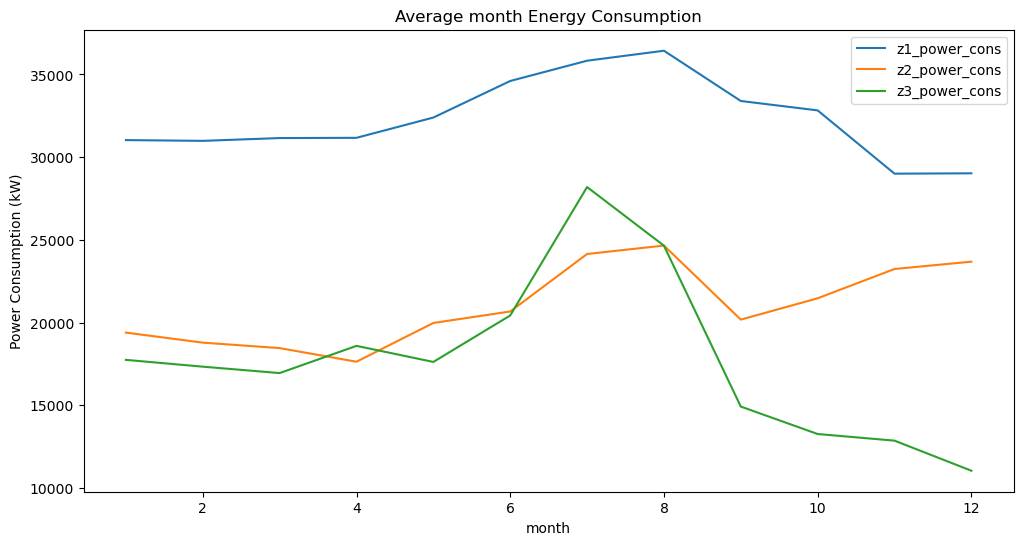

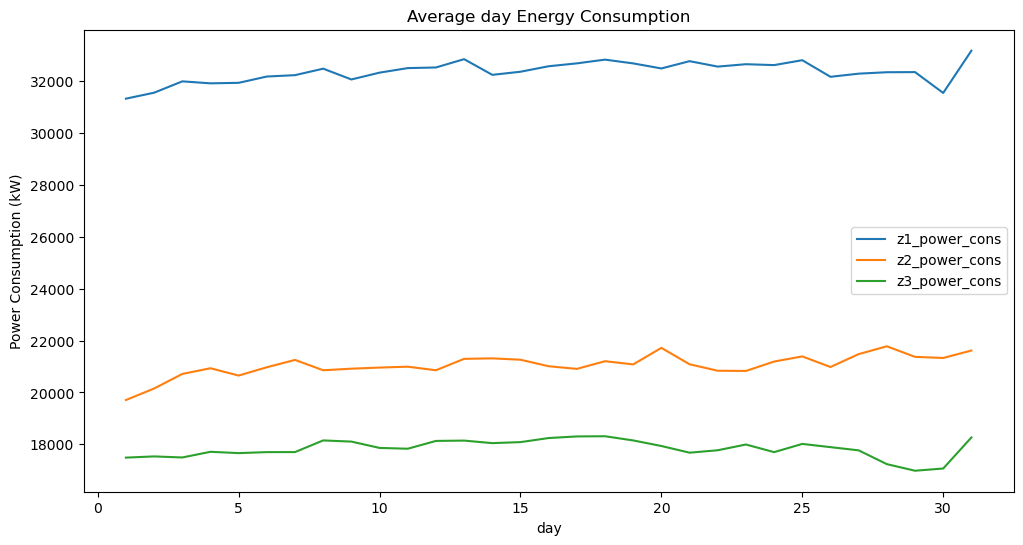

In [52]:
for time_lvl in ['hour','day_of_week','month','day']:

    grouped = df.groupby(time_lvl)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean()

    grouped.plot(figsize=(12,6))
    plt.title(f"Average {time_lvl} Energy Consumption")
    plt.ylabel("Power Consumption (kW)")
    plt.xlabel(time_lvl)
    plt.show()